# Working with JSON

## Introduction

In this mini project we will be getting familiar with packages dealing with JSON.  We will be wrangling data from the World Bank dataset involving development projects within several countries so that we may briefly analyze and transform the data while also filling in null values.

## Read in Data and Explore

In [82]:
# import libraries
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# read in data
world_bank = pd.read_json('data/world_bank_projects.json')

# initial exploration
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [84]:
world_bank.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


## Top 10 Countries with the Most Project

Now that we have explored the size, shape and type of data we are dealing with, let's look at the countries with the most projects.

In [85]:
# confirm there is a country for every project
len(world_bank['countryname']) == len(world_bank['project_name'])

True

In [86]:
# find the 10 countries with most projects
top_10_countries = world_bank['countryname'].value_counts().head(10)
top_10_countries

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

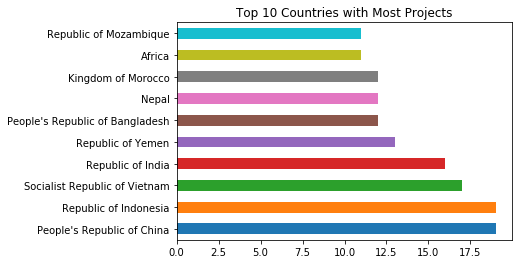

In [97]:
top_10_countries.plot(kind='barh')
plt.title('Top 10 Countries with Most Projects')
plt.show()

## Top 10 Major Project Themes

We will now look at the top 10 project themes for all the countries in the dataset.

In [6]:
# find the top 10 major project themes using 'mjtheme_namecode'
world_bank['mjtheme_namecode'][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

The the first row is populated by a list of dictionaries.  Let's see if this applies to all rows in the dataset.

In [7]:
# make sure each row is a list to see how to write for loop
check_row = 0
for row in world_bank['mjtheme_namecode']:
    if type(row) == list:
        check_row += 1 
    else:
        print(row)
        
check_row

500

Every row is a list.  Now let's write our for loop and find the top 10 project themes.

In [8]:
project_themes = {}

# each row is a list, inside the list is a dictionary,
# inside the dictionary is the 'name' key, pull value
# from name key and place it into a frequency table
for row_list in world_bank['mjtheme_namecode']:
    for dictionary in row_list:
        for key, value in dictionary.items():
            if key == 'name':
                if value in project_themes:
                    project_themes[value] += 1
                else:
                    project_themes[value] = 1


project_themes

{'Human development': 197,
 '': 122,
 'Economic management': 33,
 'Social protection and risk management': 158,
 'Trade and integration': 72,
 'Public sector governance': 184,
 'Environment and natural resources management': 223,
 'Social dev/gender/inclusion': 119,
 'Financial and private sector development': 130,
 'Rural development': 202,
 'Urban development': 47,
 'Rule of law': 12}

In [9]:
len(project_themes)

12

In [10]:
# convert dictionary to a list of tuples and sort
import operator
sorted_project_themes = sorted(project_themes.items(), key=operator.itemgetter(1), reverse=True)

# sorted_project_themes is a list of tuples
print('Top Major Project Themes:')
for index, project in enumerate(sorted_project_themes):
    print(str(index + 1) + ': ' + project[0])

Top Major Project Themes:
1: Environment and natural resources management
2: Rural development
3: Human development
4: Public sector governance
5: Social protection and risk management
6: Financial and private sector development
7: 
8: Social dev/gender/inclusion
9: Trade and integration
10: Urban development
11: Economic management
12: Rule of law


## Filling in Empty Values

The 7th most common project theme is empty, meaning there are null values, 122 to be exact.  We have to fix this to discover if there will be a different ordering in project themes.  We will use the project code to match the project name and fill in the null valuesl.

In [62]:
# create a dataframe and place the project themes and code into the dataframe
themes = pd.DataFrame(columns = ['code', 'name'])
for project in world_bank['mjtheme_namecode']:
    themes = themes.append(json_normalize(project))
    
themes.head()

,code,name
0,8,Human development
1,11,
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration


In [63]:
# group the project themes by code and place the most commonly 
# used name of each code into the missing values field.  Or 
# just create a new column.
m1 = themes.groupby('code')['name'].agg(pd.Series.mode)
themes['name_filled'] = themes['code'].map(m1)
themes.head()

,code,name,name_filled
0,8,Human development,Human development
1,11,,Environment and natural resources management
0,1,Economic management,Economic management
1,6,Social protection and risk management,Social protection and risk management
0,5,Trade and integration,Trade and integration


In [15]:
themes['name_filled'].isnull().sum()

0

Top 10 project themes.

In [76]:
themes['name_filled'].value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name_filled, dtype: int64

In [75]:
sorted_project_themes

[('Environment and natural resources management', 223),
 ('Rural development', 202),
 ('Human development', 197),
 ('Public sector governance', 184),
 ('Social protection and risk management', 158),
 ('Financial and private sector development', 130),
 ('', 122),
 ('Social dev/gender/inclusion', 119),
 ('Trade and integration', 72),
 ('Urban development', 47),
 ('Economic management', 33),
 ('Rule of law', 12)]

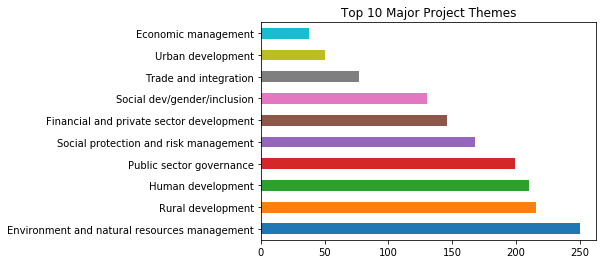

In [96]:
themes['name_filled'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Major Project Themes')
plt.show()

## Conclusion

We se that there are no more null values and when we compare the filled in project themes with the sorted tuple list of project themes, they are in the same order.